# 1

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower

In [18]:
# Reading in the csv file
df = pd.read_csv('clean_data_for_regression.csv',index_col=0)

In [53]:
df.shape

(3112, 28)

Hypothesis testing to see if the scores of the students who has both parents working is any different from students whos parents dont work

In [90]:
# finding how big my sample size has to be
effect_size = 0.8
alpha = 0.05 
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)
sample_size

25.52457250047935

In [107]:
# checking the size of these two samples 
pd.DataFrame(df['englishAtHome'].value_counts())

,englishAtHome
1.0,2759
0.0,353


The null hypothesis is that the score mean of students who speak english at home is the same as students who dont speak english at home
The alternative hypothesis is that students who speak english at home have a different average score

In [149]:
# making a two sample t test to see if these means are different
stats.ttest_ind(df[df['englishAtHome']==1]['readingScore'],df[df['englishAtHome']==0]['readingScore'],equal_var=False)

Ttest_indResult(statistic=6.695518462030327, pvalue=6.408573267797251e-11)

So we can see with a P value so low we have to reject the null


In [130]:
en_hm_mean = df[df['englishAtHome']==1]['readingScore'].mean()
no_en_hm_mean = df[df['englishAtHome']==0]['readingScore'].mean()

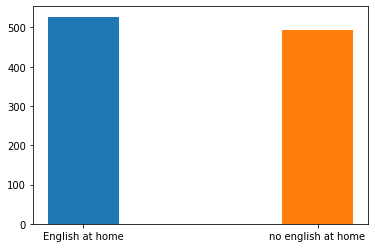

In [146]:
plt.bar(x='English at home',height=en_hm_mean,width=.3);
plt.bar(x='no english at home',height=no_en_hm_mean,width=.3);
plt.show()

In [117]:
# how many students do we have with both parents didnt go to high school
df[(df['fatherHS']==0) & (df['motherHS']==0)].shape

(185, 28)

In [122]:
parent_with_hs = df[(df['fatherHS']==1) | (df['motherHS']==1)]['readingScore']
parent_with_no_hs = df[(df['fatherHS']==0) & (df['motherHS']==0)]['readingScore']
stats.ttest_ind(parent_with_hs,parent_with_no_hs)

Ttest_indResult(statistic=7.1624038559033885, pvalue=9.85219921098708e-13)

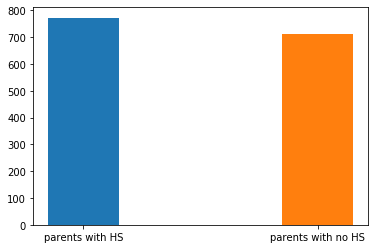

In [147]:
plt.bar(x='parents with HS',height=parent_with_hs,width=.3);
plt.bar(x='parents with no HS',height=parent_with_no_hs,width=.3);
plt.show()

In [126]:
# neither parents work sample size
df[(df['fatherWork']==0) & (df['motherWork']==0)].shape

(135, 28)

In [127]:
parent_works = df[(df['fatherWork']==1) | (df['motherWork']==1)]['readingScore']
parent_no_work = df[(df['fatherWork']==0) & (df['motherWork']==0)]['readingScore']
stats.ttest_ind(parent_works,parent_no_work)

Ttest_indResult(statistic=3.753637937998859, pvalue=0.00017747341418671562)

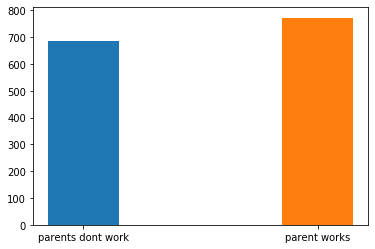

In [148]:
plt.bar(x='parents dont work',height=parent_no_work,width=.3);
plt.bar(x='parent works',height=parent_works,width=.3);
plt.show()

In [24]:
races = ['American Indian/Alaska Native', 'Asian', 'Black', 'Hispanic',
 'More than one race', 'Native Hawaiian/Other Pacific Islander', 'White',]

Plotting the mean scores for students of different races

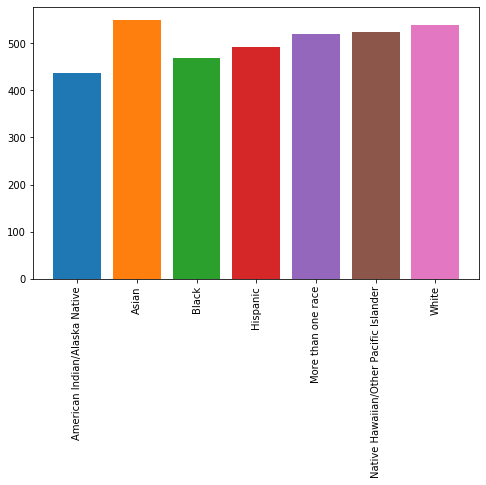

In [72]:
plt.figure(figsize=(8,5))
for race in races:
    plt.bar(x=race,height=df[df[race]==1][['readingScore']].mean())
    plt.xticks(rotation=90)

### Minutes per week in english class & their reading score

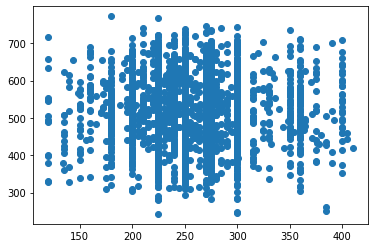

In [79]:
plt.scatter(x='minutesPerWeekEnglish',y='readingScore',data=df)

In [80]:
df.columns

Index(['American Indian/Alaska Native', 'Asian', 'Black', 'Hispanic',
       'More than one race', 'Native Hawaiian/Other Pacific Islander', 'White',
       'grade', 'male', 'preschool', 'expectBachelors', 'motherHS',
       'motherWork', 'fatherHS', 'fatherWork', 'selfBornUS', 'motherBornUS',
       'fatherBornUS', 'englishAtHome', 'computerForSchoolwork',
       'read30MinsADay', 'minutesPerWeekEnglish', 'studentsInEnglish',
       'schoolHasLibrary', 'publicSchool', 'urban', 'schoolSize',
       'readingScore'],
      dtype='object')

25.52457250047935